In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [6]:
dFrame = pd.read_excel("Data_processed.xlsx")

In [8]:
dFrame.head(5)

,GrainYield,District_Ara,District_Begusarai,District_Buxar,District_Deoria,District_EastChamparan,District_Kushinagar,District_Lakhisarai,District_Madhepura,District_Muzaffarpur,District_Rohtas,State_Bihar,State_UP,LandType_Lowland,LandType_MediumLand,LandType_Upland,SoilType_Heavy,SoilType_Low,SoilType_Medium,PreviousCrop_Fallow,PreviousCrop_Maize,PreviousCrop_Rice,PreviousCrop_Soybean,CropEstablishment_CT,CropEstablishment_CT_line,CropEstablishment_ZT,Variety_BHU_25,Variety_DBW_187,Variety_DBW_252,Variety_HD_2733,Variety_HD_2824,Variety_HD_2967,Variety_HD_2985,Variety_HD_3086,Variety_HD_3226,Variety_HI3118,Variety_HI_1563,Variety_HUW_234,Variety_LOK_1,Variety_PBW_154,Variety_PBW_343,Variety_PBW_373,Variety_PBW_550,Variety_Super_303,VarietyClass_LDV,VarietyClass_SDV,SowingSchedule_T1,SowingSchedule_T2,SowingSchedule_T3,SowingSchedule_T4,SowingSchedule_T5,HerbicideName_2_4_D,HerbicideName_2_4_DPlusLeader,HerbicideName_2_4_D_Affinity,HerbicideName_Affinity,HerbicideName_AffinityPlusTopic,HerbicideName_Affinity_Leader,HerbicideName_Algrip,HerbicideName_Broadway,HerbicideName_Clodinafob,HerbicideName_ClodinafobPlus2_4_D,HerbicideName_Clodinafob_Affinity,HerbicideName_Fit,HerbicideName_Leader,HerbicideName_Leader_2_4_D,HerbicideName_Leader_Affinity,HerbicideName_Metribuzin,HerbicideName_Metsulfuron,HerbicideName_MetsulfuronPlusSulfosulfuron,HerbicideName_Nabood(Carfentrazone),HerbicideName_SFF,HerbicideName_SFFPlusAF,HerbicideName_SFS,HerbicideName_SFSPlusAFF,HerbicideName_Sulfosulfuron,HerbicideName_TOTAL,HerbicideName_Topik,HerbicideName_TopikPlusMetsulfuron,HerbicideName_Total,HerbicideName_TotalPlusAffinity,HerbicideName_Total_2_4_D,HerbicideName_Vesta,HerbicideName_fit,HerbicideName_leader,Longitude,Latitude,PrevCropResidue,SeedRate,BasalDAP,BasalNPK,BasalMOP,BasalZn,Split1Urea,Split2Urea,Split3Urea,IrrigationNumber,FirstIrrigationDay,SecondIrrigationDay,ThirdIrrigationDay,HerbicideDose,WeedingNumber,YearYear,YearMonth,YearDay,YearWeekNum,SowingYear,SowingMonth,SowingDay,SowingWeekNum,HerbicideYear,HerbicideMonth,HerbicideDay,HerbicideWeekNum,HarvestYear,HarvestMonth,HarvestDay,HarvestWeekNum,DaysFromZerotoSowing,DaysFromSowingToHerbicide,DaysFromHerbicideToHarvest
0,A,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,83.866,25.429,50.000002,40,125.0,65.795440,27.333333,6.203125,100,100.0,50.0,4,22,45.0,75.0,16.0,1,2016,1,17,4,2016,10,1,40,2016.0,11.0,28.0,49.0,2017,4,21,16,258,58.0,144.0
1,A,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,83.866,25.428,50.000002,40,125.0,65.795440,27.333333,5.067376,100,100.0,50.0,4,22,45.0,70.0,16.0,1,2016,1,17,4,2016,10,1,40,2016.0,11.0,28.0,49.0,2017,4,24,17,258,58.0,147.0
2,B,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,84.59,26.605,10.000000,40,125.0,74.999981,25.000000,5.000000,125,50.0,75.0,3,21,43.0,64.0,16.0,0,2016,1,17,4,2016,11,10,46,2016.0,12.0,12.0,51.0,2017,4,15,15,298,32.0,124.0
3,A,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,84.805,26.536,10.000000,40,125.0,60.000000,30.000000,5.000000,145,60.0,60.0,4,21,48.0,62.0,180.0,0,2016,1,17,4,2016,11,10,46,2016.0,12.0,12.0,51.0,2017,4,18,16,298,32.0,127.0
4,A,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,84.603,26.541,10.000000,40,125.0,74.999981,27.000000,5.000000,125,50.0,75.0,2,20,46.0,64.8,16.0,0,2016,1,17,4,2016,11,10,46,2016.0,12.0,12.0,51.0,2017,4,15,15,298,32.0,124.0


In [10]:
nullValues = 0
def cleanData(dataFrame):
    for null_value in dFrame.columns:

SyntaxError: incomplete input (1130652858.py, line 3)

/var/folders/06/s6dw7j3s2630b_jxlvwkf8mh0000gn/T/ipykernel_1461/939632567.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[col].fillna(dataFrame[col].mean(), inplace=True)


Seçilen Özellikler: Index(['Longitude', 'Latitude', 'BasalMOP', 'BasalZn', 'FirstIrrigationDay',
       'ThirdIrrigationDay', 'HerbicideYear', 'DaysFromZerotoSowing',
       'DaysFromSowingToHerbicide', 'DaysFromHerbicideToHarvest'],
      dtype='object')
Model Doğruluğu: 0.6599732262382865
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       185
           1       0.68      0.66      0.67       358
           2       0.72      0.72      0.72       204

    accuracy                           0.66       747
   macro avg       0.65      0.66      0.66       747
weighted avg       0.66      0.66      0.66       747



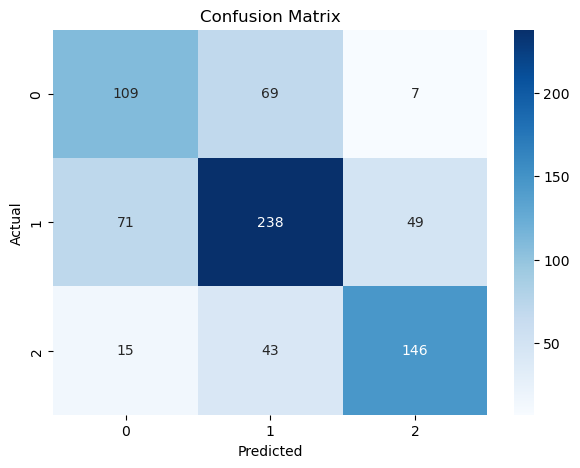

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dFrame = pd.read_excel("Data_processed.xlsx")
# Veri Temizleme
nullValues = 0.000000
def cleanData(dataFrame):
    
    # Null değerleri veya 0.0'ları NaN ile değiştir
    dataFrame.replace(0.0, np.nan, inplace=True)
    
    # Her sütun için veri tipi kontrolü yaparak doldurma işlemi
    for col in dataFrame.columns:
        if dataFrame[col].isnull().any():  # Sütunda NaN varsa işlem yap
            if dataFrame[col].dtype in ['float64', 'int64']:  # Sayısal sütun
                dataFrame[col].fillna(dataFrame[col].mean(), inplace=True)
            
    return dataFrame

# Sayısal Veriye Dönüştürme
def changeToNumeric(dataFrame):
    for col in dataFrame.columns:
        if dataFrame[col].dtype not in ['float64', 'int64']:
            dataFrame[col] = dataFrame[col].astype('category').cat.codes  # Kategorik verileri sayısallaştırma
    return dataFrame

# Özellik Seçimi ve Modelleme
def selectFeatures(dataFrame):
    X = dataFrame.drop('GrainYield', axis=1)  # Hedef değişkeni çıkarma
    y = dataFrame['GrainYield']  # Hedef değişken

    # Veriyi eğitim ve test olarak ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    
    # RFE ile özellik seçimi
    selector = RFE(model, n_features_to_select=10)
    selector = selector.fit(X_train, y_train)
    
    selected_features = X.columns[selector.support_]
    print("Seçilen Özellikler:", selected_features)
    
    # Seçilen özellikler ile eğitim verisi hazırlama
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Modeli eğitme
    model.fit(X_train_selected, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Doğruluğu:", accuracy)
    
    # Sınıflandırma raporu
    print(classification_report(y_test, y_pred))
    
    # Konfüzyon matrisi
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Veriyi temizleme ve sayısallaştırma
cleanedData = cleanData(dFrame)
dFrame = changeToNumeric(cleanedData)

# Özellik seçimi ve modelleme
selectFeatures(dFrame)


Seçilen Özellikler: Index(['Longitude', 'Latitude'], dtype='object')
Model Doğruluğu: 0.5689424364123159
              precision    recall  f1-score   support

           0       0.47      0.52      0.49       185
           1       0.61      0.67      0.64       358
           2       0.59      0.43      0.50       204

    accuracy                           0.57       747
   macro avg       0.56      0.54      0.54       747
weighted avg       0.57      0.57      0.57       747



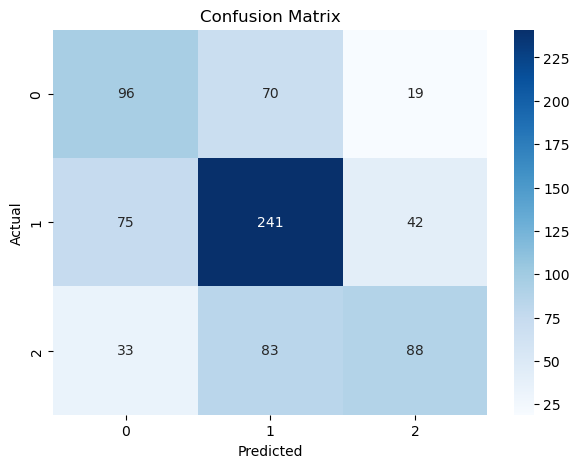

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Veri Temizleme
nullValues = 0.000000
def cleanData(dataFrame):
    for index in dataFrame.columns:
        if nullValues in dataFrame[index].values:
            # Missing values are replaced by the mean of the respective column
            dataFrame[index] = dataFrame[index].mean()
    return dataFrame

# Sayısal Veriye Dönüştürme
def changeToNumeric(dataFrame):
    for col in dataFrame.columns:
        if dataFrame[col].dtype not in ['float64', 'int64']:
            # Convert categorical columns to numeric
            dataFrame[col] = dataFrame[col].astype('category').cat.codes  
    return dataFrame

# Özellik Seçimi ve Modelleme
def selectFeatures(dataFrame):
    # Defining the target (dependent variable) and predictors (independent variables)
    X = dataFrame.drop('GrainYield', axis=1)  # Drop the target variable (GrainYield)
    y = dataFrame['GrainYield']  # Target variable
    
    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier
    
    # Perform feature selection using Recursive Feature Elimination (RFE)
    selector = RFE(model, n_features_to_select=2)  # Select top 2 features
    selector = selector.fit(X_train, y_train)
    
    selected_features = X.columns[selector.support_]  # Get the selected features
    print("Seçilen Özellikler:", selected_features)
    
    # Prepare training and testing data based on selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Train the model on selected features
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_selected)
    
    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Doğruluğu:", accuracy)
    
    # Print classification report (precision, recall, F1-score)
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Data loading (make sure to load the dataset correctly)
dFrame = pd.read_excel('Data_processed.xlsx')

# Veriyi temizleme ve sayısallaştırma
cleanedData = cleanData(dFrame)  # Clean the data
dFrame = changeToNumeric(cleanedData)  # Convert categorical columns to numeric

# Özellik seçimi ve modelleme
selectFeatures(dFrame)  # Perform feature selection and train the model